## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [180]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

seed = 42

In [181]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [183]:
missing_values = titanic.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


- Age and cabin and embark has missing values

### Hypothesis
- Hypothesis 1: Determine if the survival rate is associated to the class of passenger
- Hypothesis 2: Determine if the survival rate is associated to the gender
- Hypothesis 3: Determine the survival rate is associated to the age

#### Hypothesis 1: Determine if the survival rate is associated to the class of passenger

In [184]:
class_survival_percentage = titanic.groupby('Pclass')['Survived'].mean() * 100
class_survival_percentage = class_survival_percentage.rename('Survival Percentage')
class_survival_percentage.reset_index()

,Pclass,Survival Percentage
0,1,62.962963
1,2,47.282609
2,3,24.236253


In [273]:
confusion_matrix_class = pd.crosstab(titanic['Pclass'], titanic['Survived'])
confusion_matrix_class.columns = ["Died", "Survived"]
confusion_matrix_class.reset_index()

,Pclass,Died,Survived
0,1,80,136
1,2,97,87
2,3,372,119


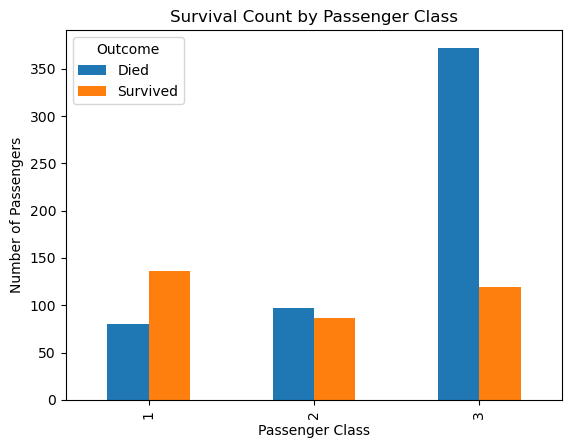

In [274]:
confusion_matrix_class.plot(kind='bar', stacked=False)
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title('Survival Count by Passenger Class')
plt.legend(title='Outcome')
plt.savefig('./output/survival_count_by_passenger_class.png')
plt.show()

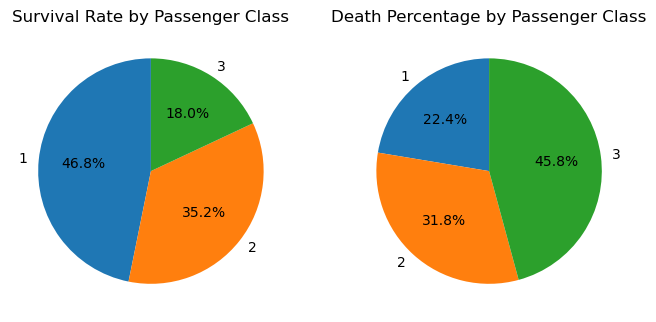

In [ ]:
survival_rate_class = titanic.groupby('Pclass')['Survived'].mean()
class_death_rate = titanic.groupby("Pclass")["Survived"].apply(
    lambda x: (1 - x.mean()) * 100
)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

survival_rate_class.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=axes[0])
axes[0].set_title("Survival Rate by Passenger Class")
axes[0].set_ylabel("")

class_death_rate.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=axes[1])
axes[1].set_title("Death Percentage by Passenger Class")
axes[1].set_ylabel("")

plt.savefig("./output/passenger_class_survival_pie.png")
plt.show()

- From the plots we can see that the survival rate is higher for passengers in first class compared to second and third class.
- There is some correlation between the passenger class and the survival rate as passengers in first class have a higher survival rate compared to passengers in second and third class.

### Hypothesis 2: Determine if the survival rate is associated to the gender

In [109]:
gender_survival_percentage = titanic.groupby('Sex')['Survived'].mean() * 100
gender_survival_percentage = gender_survival_percentage.rename('Survival Percentage')
gender_survival_percentage.reset_index()

,Sex,Survival Percentage
0,female,74.203822
1,male,18.890815


In [112]:
conf_gender = pd.crosstab(titanic["Sex"], titanic["Survived"])
conf_gender.columns = ["Died", "Survived"]
conf_gender.reset_index()

,Sex,Died,Survived
0,female,81,233
1,male,468,109


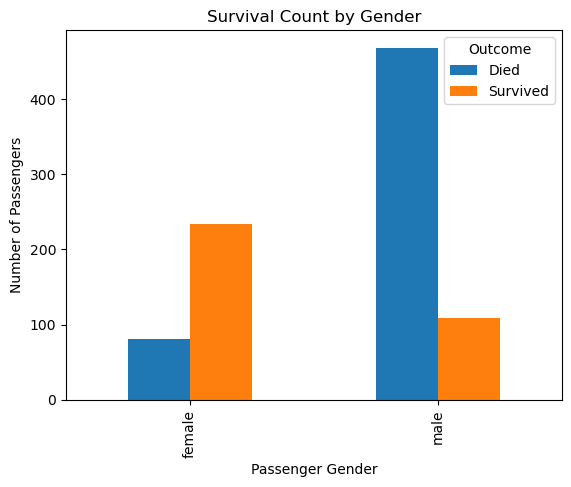

In [275]:
conf_gender.plot(kind="bar", stacked=False)
plt.xlabel("Passenger Gender")
plt.ylabel("Number of Passengers")
plt.title("Survival Count by Gender")
plt.legend(title="Outcome")
plt.savefig("./output/survival_count_by_gender.png")
plt.show()

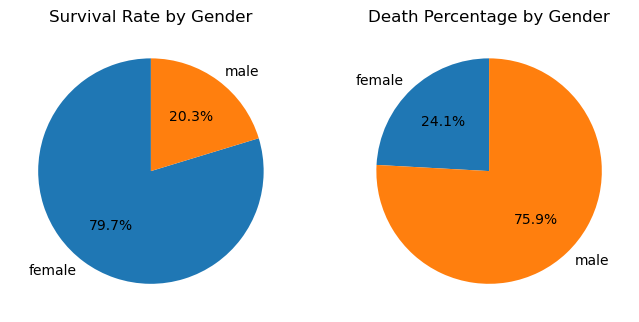

In [186]:
gender_survival_rate = titanic.groupby("Sex")["Survived"].mean()
gender_death_rate = titanic.groupby("Sex")["Survived"].apply(
    lambda x: (1 - x.mean()) * 100
)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

gender_survival_rate.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=axes[0])
axes[0].set_title("Survival Rate by Gender")
axes[0].set_ylabel("")

gender_death_rate.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=axes[1])
axes[1].set_title("Death Percentage by Gender")
axes[1].set_ylabel("")

plt.savefig("./output/gender_survival_gender.png")
plt.show()

- From the plots we can see that the survival rate is higher for female then male as 79.7% of people that survived were female. Similarly 75.9% of the people that did not survive were male.
- There is good correlation between the gender and survival rate as females had a higher rate of survival than male.

### Hypothesis 3: Determine the survival rate is associated to the age

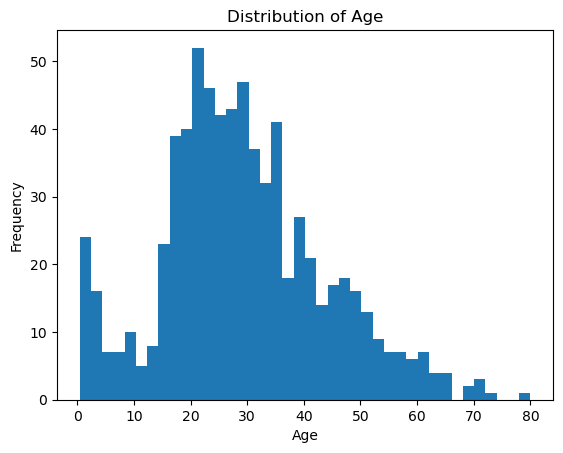

In [149]:
plt.hist(titanic["Age"].dropna(), bins=40)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

- Age has multi modal distribution

In [159]:
age_groups = {
  '0-10': range(0, 10),
  '10-20': range(10, 20),
  '20-30': range(20, 30),
  '30-40': range(30, 40),
  '40-50': range(40, 50),
  '50-60': range(50, 60),
  '60-70': range(60, 70),
  '70-80': range(70, 80)
}

def get_age_group(age):
  for group, age_range in age_groups.items():
    if age in age_range:
      return group
  return 'None'

titanic['AgeGroup'] = titanic['Age'].apply(get_age_group)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-40


In [160]:
titanic['AgeGroup'].value_counts()

AgeGroup
20-30    215
None     203
30-40    161
10-20    101
40-50     85
0-10      55
50-60     47
60-70     19
70-80      5
Name: count, dtype: int64

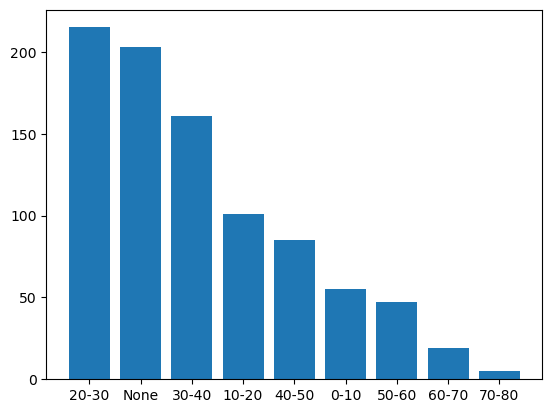

In [164]:
plt.bar(titanic['AgeGroup'].value_counts().index, titanic['AgeGroup'].value_counts().values)
plt.show()

- Age 20-30 is the most common age group in the dataset
- 203 passengers do not have age group

In [169]:
# removing the None age group
filtered_age = titanic[titanic['AgeGroup'] != 'None']
conf_age = pd.crosstab(filtered_age["AgeGroup"], filtered_age["Survived"])
conf_age.columns = ["Died", "Survived"]
conf_age.reset_index()

,AgeGroup,Died,Survived
0,0-10,24,31
1,10-20,60,41
2,20-30,138,77
3,30-40,89,72
4,40-50,51,34
5,50-60,27,20
6,60-70,13,6
7,70-80,5,0


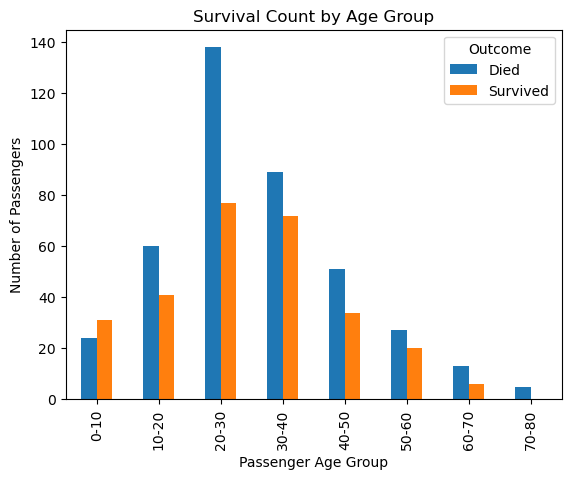

In [276]:
conf_age.plot(kind="bar", stacked=False)
plt.xlabel("Passenger Age Group")
plt.ylabel("Number of Passengers")
plt.title("Survival Count by Age Group")
plt.legend(title="Outcome")
plt.savefig("./output/survival_count_by_age_group.png")
plt.show()

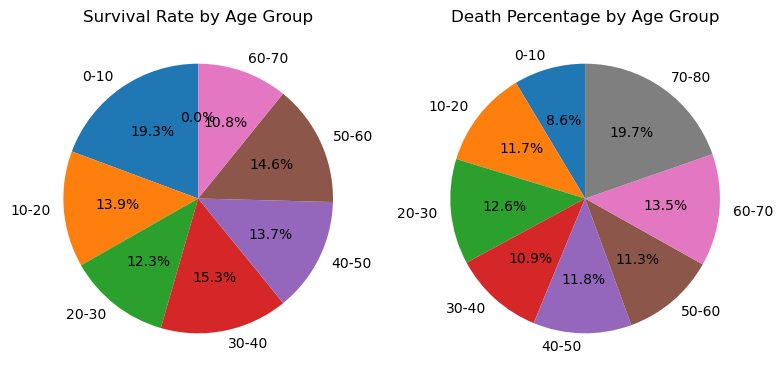

In [179]:
age_group_survival_rate = filtered_age.groupby("AgeGroup")["Survived"].mean()
age_group_death_rate = filtered_age.groupby("AgeGroup")["Survived"].apply(
    lambda x: (1 - x.mean()) * 100
)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

age_group_survival_rate.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=axes[0])
axes[0].set_title("Survival Rate by Age Group")
axes[0].set_ylabel("")

age_group_death_rate.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=axes[1])
axes[1].set_title("Death Percentage by Age Group")
axes[1].set_ylabel("")

plt.savefig("./output/age_group_survival.png")
plt.tight_layout()
plt.show()

- None of the people between age group 70-80 survived.
- There does not seem to be any significant corelation between age and survival percentage. Almost all the age group had similar survival rate. Only the kids had better survival rate than others but it is not a clear outlier